In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 今回は回帰分析を行うにあたって、sklearnのLineaRegressionを使用する
from sklearn.linear_model import LinearRegression

/Users/ken/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


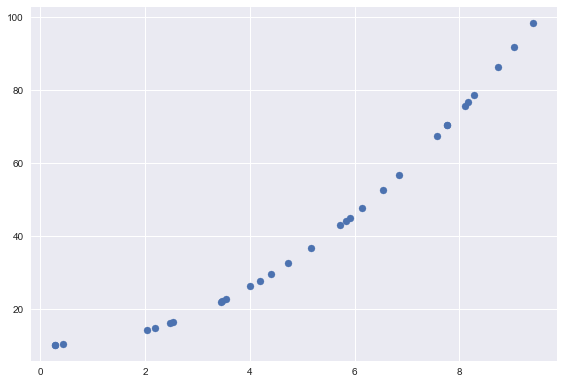

In [20]:
# sample数30個とする
n_sample = 30
# 乱数を30個作って、順番をsortして10倍している
x = np.sort(np.random.rand(n_sample)) * 10
# 1次関数でyを定義し、plotする
y = x**2 + 10
plt.scatter(x, y)

In [21]:
# LinearRegressionモデルを初期化して、先程つくったinput dataでモデルにfitさせる（学習させる）
lr = LinearRegression()
lr.fit(np.vstack(x), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
np.vstack(x)

array([[ 0.28305335],
       [ 0.28883174],
       [ 0.43558785],
       [ 2.03927609],
       [ 2.18484613],
       [ 2.47531611],
       [ 2.53643974],
       [ 3.44566041],
       [ 3.47174296],
       [ 3.54357485],
       [ 4.00669245],
       [ 4.20033304],
       [ 4.40138476],
       [ 4.73646903],
       [ 5.1630813 ],
       [ 5.72777864],
       [ 5.84201545],
       [ 5.90541303],
       [ 6.13867943],
       [ 6.53115845],
       [ 6.83794217],
       [ 7.57501215],
       [ 7.76553049],
       [ 7.76777376],
       [ 8.10118541],
       [ 8.16686827],
       [ 8.28216284],
       [ 8.72702809],
       [ 9.04101852],
       [ 9.40266283]])

In [23]:
x[:, np.newaxis]

array([[ 0.28305335],
       [ 0.28883174],
       [ 0.43558785],
       [ 2.03927609],
       [ 2.18484613],
       [ 2.47531611],
       [ 2.53643974],
       [ 3.44566041],
       [ 3.47174296],
       [ 3.54357485],
       [ 4.00669245],
       [ 4.20033304],
       [ 4.40138476],
       [ 4.73646903],
       [ 5.1630813 ],
       [ 5.72777864],
       [ 5.84201545],
       [ 5.90541303],
       [ 6.13867943],
       [ 6.53115845],
       [ 6.83794217],
       [ 7.57501215],
       [ 7.76553049],
       [ 7.76777376],
       [ 8.10118541],
       [ 8.16686827],
       [ 8.28216284],
       [ 8.72702809],
       [ 9.04101852],
       [ 9.40266283]])

In [1]:
lr.fit(np.vstack(x), y)
# fitでLInearRegressionというモデルに対して、input dataでfitさせて時点で学習はできている
# Linear Regressionの場合は、predictで予測値を取得できる
predicted_y = lr.predict(np.vstack(x))

NameError: name 'lr' is not defined

/Users/ken/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


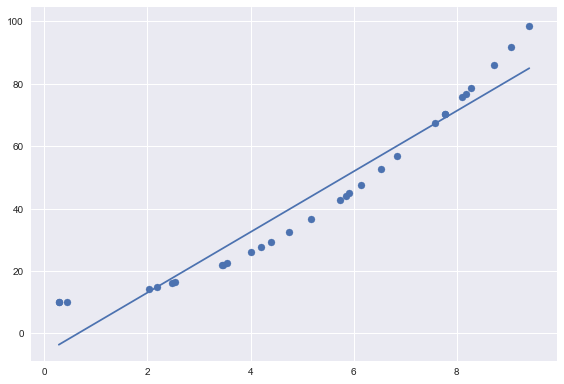

In [25]:
plt.plot(x, predicted_y)
plt.scatter(x, y)

In [26]:
pd.DataFrame(np.c_[x, y], columns=['x', 'y'])

,x,y
0,0.283053,10.080119
1,0.288832,10.083424
2,0.435588,10.189737
3,2.039276,14.158647
4,2.184846,14.773553
5,2.475316,16.127190
6,2.536440,16.433527
7,3.445660,21.872576
8,3.471743,22.052999
9,3.543575,22.556923


/Users/ken/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


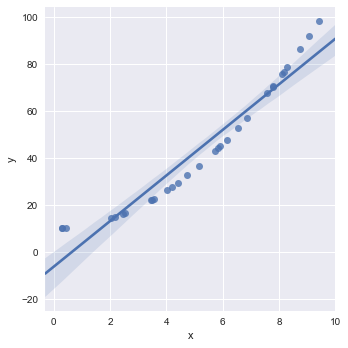

In [27]:
# 今まではsklearnのLinear Regressionを使用してきたが、実はseabornでは自動的に線形回帰分析を行ってくれる
import seaborn as sns
sns.lmplot('x', 'y', pd.DataFrame(np.c_[x, y], columns=['x', 'y']))

/Users/ken/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


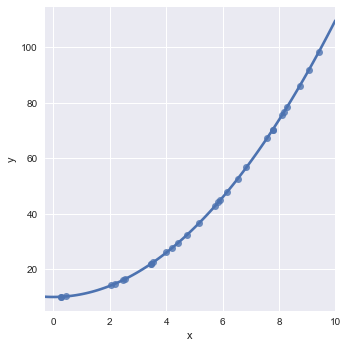

In [53]:
# seabornでは簡単に多項式での回帰分析もできる
sns.lmplot('x', 'y', pd.DataFrame(np.c_[x, y], columns=['x', 'y']), order=2)

In [30]:
# 多項式での線形回帰分析をsklearnを使って行うためには、PolynomialFeaturesを使って前処理を行う
from sklearn.preprocessing import PolynomialFeatures

In [56]:
pf = PolynomialFeatures(degree=2)
pf.fit(np.vstack(x))
transformed_x = pf.transform(np.vstack(x))
transformed_x

array([[  1.00000000e+00,   2.83053353e-01,   8.01192005e-02],
       [  1.00000000e+00,   2.88831743e-01,   8.34237755e-02],
       [  1.00000000e+00,   4.35587852e-01,   1.89736777e-01],
       [  1.00000000e+00,   2.03927609e+00,   4.15864698e+00],
       [  1.00000000e+00,   2.18484613e+00,   4.77355260e+00],
       [  1.00000000e+00,   2.47531611e+00,   6.12718986e+00],
       [  1.00000000e+00,   2.53643974e+00,   6.43352656e+00],
       [  1.00000000e+00,   3.44566041e+00,   1.18725757e+01],
       [  1.00000000e+00,   3.47174296e+00,   1.20529992e+01],
       [  1.00000000e+00,   3.54357485e+00,   1.25569227e+01],
       [  1.00000000e+00,   4.00669245e+00,   1.60535844e+01],
       [  1.00000000e+00,   4.20033304e+00,   1.76427977e+01],
       [  1.00000000e+00,   4.40138476e+00,   1.93721878e+01],
       [  1.00000000e+00,   4.73646903e+00,   2.24341389e+01],
       [  1.00000000e+00,   5.16308130e+00,   2.66574085e+01],
       [  1.00000000e+00,   5.72777864e+00,   3.2807448

In [57]:
x, transformed_x

(array([ 0.28305335,  0.28883174,  0.43558785,  2.03927609,  2.18484613,
         2.47531611,  2.53643974,  3.44566041,  3.47174296,  3.54357485,
         4.00669245,  4.20033304,  4.40138476,  4.73646903,  5.1630813 ,
         5.72777864,  5.84201545,  5.90541303,  6.13867943,  6.53115845,
         6.83794217,  7.57501215,  7.76553049,  7.76777376,  8.10118541,
         8.16686827,  8.28216284,  8.72702809,  9.04101852,  9.40266283]),
 array([[  1.00000000e+00,   2.83053353e-01,   8.01192005e-02],
        [  1.00000000e+00,   2.88831743e-01,   8.34237755e-02],
        [  1.00000000e+00,   4.35587852e-01,   1.89736777e-01],
        [  1.00000000e+00,   2.03927609e+00,   4.15864698e+00],
        [  1.00000000e+00,   2.18484613e+00,   4.77355260e+00],
        [  1.00000000e+00,   2.47531611e+00,   6.12718986e+00],
        [  1.00000000e+00,   2.53643974e+00,   6.43352656e+00],
        [  1.00000000e+00,   3.44566041e+00,   1.18725757e+01],
        [  1.00000000e+00,   3.47174296e+00,   1

In [61]:
lr = LinearRegression()
lr.fit(transformed_x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/ken/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


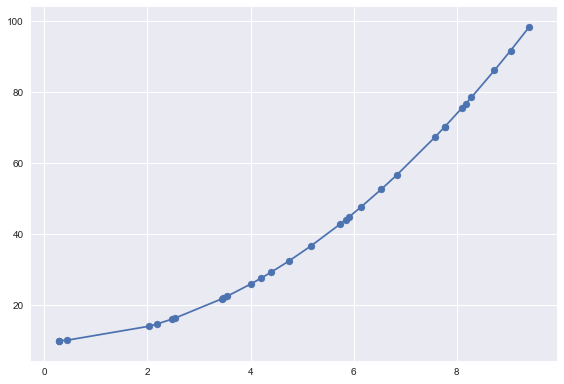

In [64]:
plt.plot(x, lr.predict(transformed_x))
plt.scatter(x, y)

In [4]:
# overfittingを防ぐために、L1正則化やL2正則化といった手法が使われる
# sklearnではL2正則化を用いたリッジ回帰が用意されている
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(np.vstack(x), y)
plt.plot(x, r.predict(np.vstack(x)))
plt.scatter(x, y)

NameError: name 'x' is not defined